In [1]:
# import library for 이미지 가공
from PIL import Image
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import cv2

# Data Load // Data 디렉토리 아래 파일이 있어야 함
digit_data_trval=np.load('Data/digit_data_TrVal-1.npz')
digit_data_test=np.load('Data/digit_data_10_Test_1.npz')
op_data_trval=np.load('Data/op_data_TrVal-1.npz')
op_data_test=np.load('Data/op_data_10_Test_1.npz')

#print(digit_data_trval['img'].shape, digit_data_trval['img'].dtype,digit_data_trval['label'].shape, digit_data_trval['label'].dtype)
#print(digit_data_test['img'].shape, digit_data_test['img'].dtype, digit_data_test['label'].shape, digit_data_test['label'].dtype)
#print(op_data_trval['img'].shape, op_data_trval['img'].dtype, op_data_trval['label'].shape, op_data_trval['label'].dtype)
#print(op_data_test['img'].shape, op_data_test['img'].dtype, op_data_test['label'].shape, op_data_test['label'].dtype)

# train set 이미지와 레이블 추출
op_trval_images = op_data_trval['img']
op_trval_labels = op_data_trval['label']
digit_trval_images = digit_data_trval['img']
digit_trval_labels  = digit_data_trval['label']

# train set 이미지와 레이블 합치기
merged_trval_images =  list(digit_trval_images) + list(op_trval_images) 
merged_trval_labels =  list(digit_trval_labels) + list(op_trval_labels)


# test set 이미지와 레이블 추출
op_test_images = op_data_test['img']
op_test_labels = op_data_test['label']
digit_test_images = digit_data_test['img']
digit_test_labels  = digit_data_test['label']

# test 이미지와 레이블 합치기
merged_test_images = list(op_test_images) + list(digit_test_images)
merged_test_labels = list(op_test_labels) + list(digit_test_labels)

merged_trval_images = np.array(merged_trval_images)
merged_test_images = np.array(merged_test_images)

# 이미지를 1차원으로 변환
merged_trval_images_flat = merged_trval_images.reshape(merged_trval_images.shape[0], -1)
merged_test_images_flat = merged_test_images.reshape(merged_test_images.shape[0], -1)

#valid_labels = set(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])#, '+', '-', '/', 'x'])
valid_labels = set(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '/', 'x'])

# 숫자 및 연산 기호가 아닌 데이터의 인덱스 찾기
invalid_trval_indices = [i for i, label in enumerate(merged_trval_labels) if label not in valid_labels]
invalid_test_indices = [i for i, label in enumerate(merged_test_labels) if label not in valid_labels]

# 숫자 및 연산 기호가 아닌 데이터 제거
d_X_train = np.delete(merged_trval_images_flat, invalid_trval_indices, axis=0)
d_y_train = np.delete(merged_trval_labels, invalid_trval_indices)

d_X_test = np.delete(merged_test_images_flat, invalid_test_indices, axis=0)
d_y_test = np.delete(merged_test_labels, invalid_test_indices)

# 데이터는 셔플 되어 있다고 가정
from collections import defaultdict

# 각 레이블별 인덱스 추출
label_indices_train = defaultdict(list)
label_indices_test = defaultdict(list)

# Train set에서 각 레이블별 인덱스 추출
for idx, label in enumerate(d_y_train):
    label_indices_train[label].append(idx)

# Test set에서 각 레이블별 인덱스 추출
for idx, label in enumerate(d_y_test):
    label_indices_test[label].append(idx)

# 데이터 크기 반으로
size=10
    
# 각 레이블별로 train set은 400개, test set은 70개로 제한
selected_indices_train = []
selected_indices_test = []

for label, indices in label_indices_train.items():
    selected_indices_train.extend(indices[:int(420*size)])

for label, indices in label_indices_test.items():
    selected_indices_test.extend(indices[:int(70*size)])

# 선택된 인덱스로부터 데이터 구성
X_train = d_X_train[selected_indices_train]
y_train = d_y_train[selected_indices_train]

X_test = d_X_test[selected_indices_test]
y_test = d_y_test[selected_indices_test]

# 모델 선정용 데이터 shape 확인
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# 모델 선정용 데이터 절감 비율 확인
train_reduction_ratio = round(d_y_train.shape[0] / y_train.shape[0], 2)
test_reduction_ratio =  round(d_y_test.shape[0] / y_test.shape[0], 2)
print("\ntrain 절감 비율 : ", train_reduction_ratio)
print("test 절감 비율 : ",test_reduction_ratio)

X_train shape: (26249, 784)
y_train shape: (26249,)
X_test shape: (3730, 784)
y_test shape: (3730,)

train 절감 비율 :  1.0
test 절감 비율 :  1.0


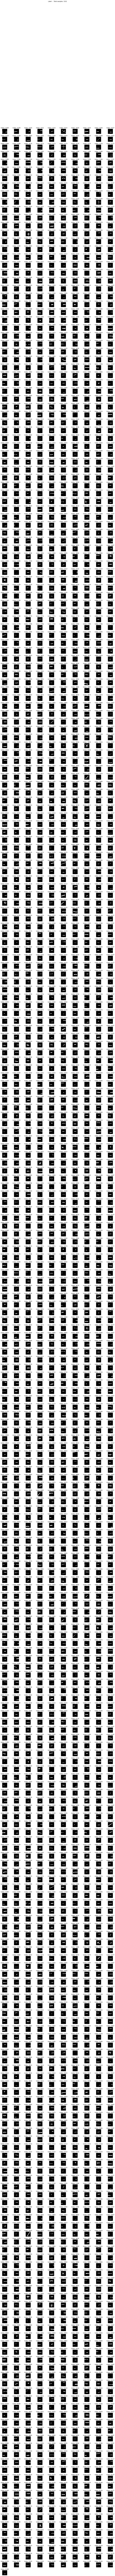

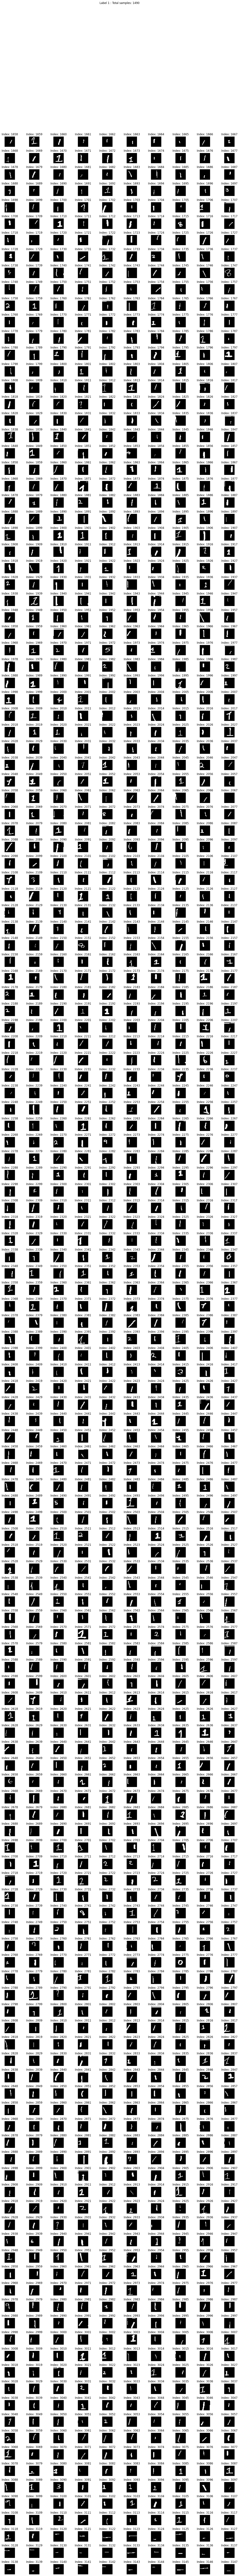

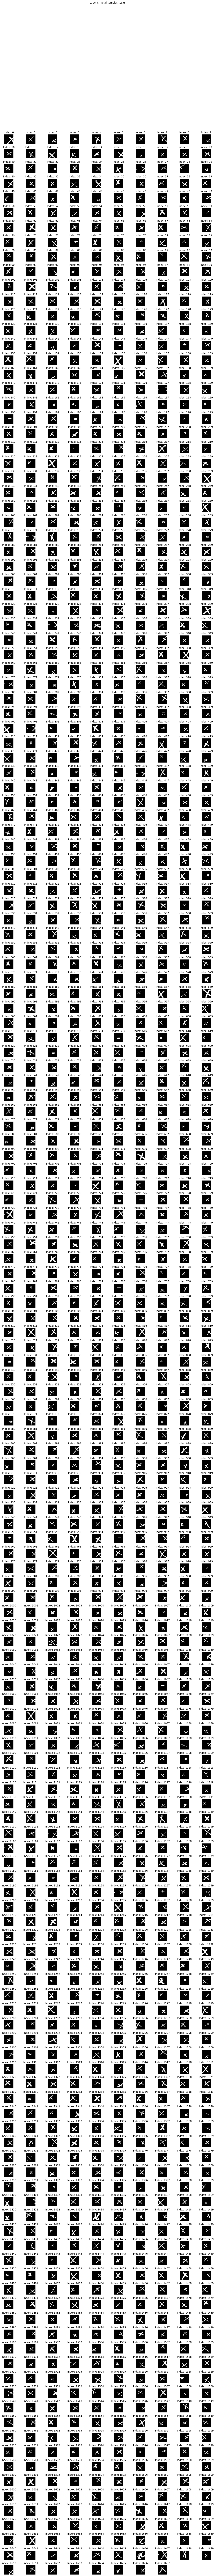

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def show_all_images_by_label(X, y):
    unique_labels = np.unique(y)
    
    for label in unique_labels:
        label_indices = np.where(y == label)[0]
        num_samples = len(label_indices)
        
        num_rows = (num_samples // 10) + 1  # 한 줄에 10개씩 이미지를 표시합니다.
        plt.figure(figsize=(15, num_rows))
        
        for i, index in enumerate(label_indices):
            plt.subplot(num_rows, 10, i + 1)
            plt.imshow(X[index].reshape(28, 28), cmap='gray')
            plt.axis('off')
            plt.title(f'Index: {index}')  # 데이터 인덱스 출력
            
        plt.suptitle(f'Label {label} : Total samples: {num_samples}', y=1.05)
        plt.tight_layout()
        plt.show()

# X_train, y_train을 사용하여 함수를 호출합니다.
show_all_images_by_label(X_train[20000:30000], y_train[20000:30000])